In [53]:
import pandas as pd

In [54]:
pd.options.display.float_format = '{:,.2f}'.format

In [55]:
rates = pd.read_csv("cleaned/rates.csv")

rates

,jurisdiction,slug,country,location,season,total,mealsAndIncidentals
0,Canada,albania-tirana,Albania,Tirana,NaN,42.38,nan
1,Canada,albania,Albania,Other,NaN,33.90,nan
2,Canada,algeria-algiers,Algeria,Algiers,NaN,134.44,nan
3,Canada,algeria,Algeria,Other,NaN,107.56,nan
4,Canada,angola-luanda,Angola,Luanda,NaN,262.80,nan
5,Canada,angola,Angola,Other,NaN,210.24,nan
6,Canada,anguilla-the-valley,Anguilla,The Valley,NaN,174.44,nan
7,Canada,antigua-and-barbuda-st.-john's,Antigua and Barbuda,St. John's,NaN,226.45,nan
8,Canada,argentina-buenos-aires,Argentina,Buenos Aires,NaN,95.03,nan
9,Canada,argentina,Argentina,Other,NaN,76.02,nan


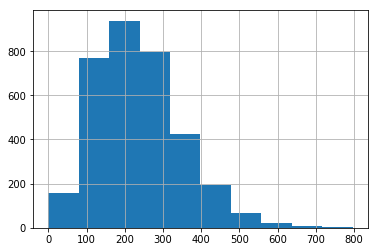

In [56]:
rates['total'].hist()

In [57]:
capitals = pd.read_csv("cleaned/capitals.csv")

capitals

,Short-form name,Long-form name,GENC 2A Code (see Note 2),GENC 3A Code (see Note 2),Capital,slug
0,Afghanistan *+,Islamic Republic of Afghanistan,AF,AFG,Kabul,afghanistan-kabul
1,Albania *+,Republic of Albania,AL,ALB,Tirana,albania-tirana
2,Algeria *+,People's Democratic Republic of Algeria,DZ,DZA,Algiers,algeria-algiers
3,Andorra *+,Principality of Andorra,AD,AND,Andorra la Vella,andorra-andorra-la-vella
4,Angola *+,Republic of Angola,AO,AGO,Luanda,angola-luanda
5,Antigua and\nBarbuda *+,Antigua and Barbuda,AG,ATG,Saint John's,antigua-and-barbuda-saint-john's
6,Argentina *+,Argentine Republic,AR,ARG,Buenos Aires,argentina-buenos-aires
7,Armenia *+,Republic of Armenia,AM,ARM,Yerevan,armenia-yerevan
8,Australia *+,Commonwealth of Australia,AU,AUS,Canberra,australia-canberra
9,Austria *+,Republic of Austria,AT,AUT,Vienna,austria-vienna


In [58]:
rates = rates.loc[rates.groupby(['jurisdiction','slug'])['total'].idxmin(skipna=False)]

In [77]:
us_rates = rates[rates['jurisdiction'] == 'US']

us_rates = us_rates[~us_rates['country'].isin(['AFGHANISTAN','ANTARCTICA','IRAQ','LIBYA','SOMALIA'])].copy()

us_rates = us_rates.merge(capitals[['slug']], on='slug', how='right').reset_index()

us_rates[us_rates['jurisdiction'].isnull()]['slug']

152                             afghanistan-kabul
153                      andorra-andorra-la-vella
154              antigua-and-barbuda-saint-john's
155                           barbados-bridgetown
156                              benin-porto-novo
157                                bhutan-thimphu
158                                chad-n'djamena
159                             congo-brazzaville
160                                congo-kinshasa
161                                czechia-prague
162                             djibouti-djibouti
163                               dominica-roseau
164                    !-eswatini-mbabane-lobamba
165                        grenada-saint-george's
166                         holy-see-vatican-city
167                                  iraq-baghdad
168                              israel-jerusalem
169                                   japan-tokyo
170                               kiribati-tarawa
171                         korea-north-pyongyang


In [60]:
us_rates = rates[rates['jurisdiction'] == 'US']

us_rates = us_rates[~us_rates['country'].isin(['AFGHANISTAN','ANTARCTICA','IRAQ','LIBYA','SOMALIA'])].copy()

us_rates = us_rates.merge(capitals[['slug']], on='slug', how='inner').reset_index()

eu_rates = rates[rates['jurisdiction'] == 'EU'].copy()

other_rates = rates[~rates['jurisdiction'].isin(['US','EU'])].copy()

us_vs_other_rates = us_rates.merge(other_rates, on='slug', how='inner').reset_index()

eu_rates['country'] = eu_rates['country'].str.upper()

us_vs_eu_rates = us_rates.merge(eu_rates, on='country', how='inner').reset_index()

us_vs_other_rates = pd.concat([us_vs_other_rates,us_vs_eu_rates], ignore_index=True)

us_vs_other_rates

,country,country_x,country_y,index,jurisdiction_x,jurisdiction_y,level_0,location_x,location_y,mealsAndIncidentals_x,mealsAndIncidentals_y,season_x,season_y,slug,slug_x,slug_y,total_x,total_y
0,NaN,ALBANIA,Albania,0,US,Canada,0,Tirana,Tirana,95.00,nan,S1,NaN,albania-tirana,NaN,NaN,285.00,42.38
1,NaN,ALBANIA,ALBANIA,0,US,UK,1,Tirana,Tirana,95.00,nan,S1,NaN,albania-tirana,NaN,NaN,285.00,223.89
2,NaN,ALBANIA,Albania,0,US,UN,2,Tirana,Tirana,95.00,nan,S1,NaN,albania-tirana,NaN,NaN,285.00,147.00
3,NaN,ALGERIA,Algeria,1,US,Canada,3,Algiers,Algiers,75.00,nan,S1,NaN,algeria-algiers,NaN,NaN,255.00,134.44
4,NaN,ALGERIA,ALGERIA,1,US,UK,4,Algiers,Algiers,75.00,nan,S1,NaN,algeria-algiers,NaN,NaN,255.00,286.55
5,NaN,ALGERIA,Algeria,1,US,UN,5,Algiers,Algiers,75.00,nan,S1,NaN,algeria-algiers,NaN,NaN,255.00,211.00
6,NaN,ANGOLA,Angola,2,US,Canada,6,Luanda,Luanda,170.00,nan,S1,NaN,angola-luanda,NaN,NaN,575.00,262.80
7,NaN,ANGOLA,ANGOLA,2,US,UK,7,Luanda,Luanda,170.00,nan,S1,NaN,angola-luanda,NaN,NaN,575.00,495.84
8,NaN,ANGOLA,Angola,2,US,UN,8,Luanda,Luanda,170.00,nan,S1,NaN,angola-luanda,NaN,NaN,575.00,400.00
9,NaN,ARGENTINA,Argentina,3,US,Canada,9,Buenos Aires,Buenos Aires,129.00,nan,S1,NaN,argentina-buenos-aires,NaN,NaN,396.00,95.03


In [61]:
us_vs_other_rates['diff'] = (us_vs_other_rates['total_x'] - us_vs_other_rates['total_y']) / us_vs_other_rates['total_y']

us_vs_other_rates.loc[us_vs_other_rates['jurisdiction_y'] == 'Canada','diff'] = (us_vs_other_rates['mealsAndIncidentals_x'] - us_vs_other_rates['total_y']) / us_vs_other_rates['total_y']


In [62]:
us_vs_other_rates['diff'].describe()

count     509.00
mean       25.21
std       445.01
min        -0.53
25%        -0.04
50%         0.16
75%         0.44
max     9,530.58
Name: diff, dtype: float64

In [63]:
us_vs_other_rates[us_vs_other_rates['diff'] < -10]

,country,country_x,country_y,index,jurisdiction_x,jurisdiction_y,level_0,location_x,location_y,mealsAndIncidentals_x,mealsAndIncidentals_y,season_x,season_y,slug,slug_x,slug_y,total_x,total_y,diff


In [64]:
us_vs_other_rates[us_vs_other_rates['diff'] > 0.9]

,country,country_x,country_y,index,jurisdiction_x,jurisdiction_y,level_0,location_x,location_y,mealsAndIncidentals_x,mealsAndIncidentals_y,season_x,season_y,slug,slug_x,slug_y,total_x,total_y,diff
0,NaN,ALBANIA,Albania,0,US,Canada,0,Tirana,Tirana,95.00,nan,S1,NaN,albania-tirana,NaN,NaN,285.00,42.38,1.24
2,NaN,ALBANIA,Albania,0,US,UN,2,Tirana,Tirana,95.00,nan,S1,NaN,albania-tirana,NaN,NaN,285.00,147.00,0.94
20,NaN,AZERBAIJAN,AZERBAIJAN,7,US,UK,20,Baku,Baku,115.00,nan,S1,NaN,azerbaijan-baku,NaN,NaN,361.00,165.05,1.19
21,NaN,AZERBAIJAN,Azerbaijan,7,US,UN,21,Baku,Baku,115.00,nan,S1,NaN,azerbaijan-baku,NaN,NaN,361.00,179.00,1.02
26,NaN,BANGLADESH,Bangladesh,10,US,UN,26,Dhaka,Dhaka,90.00,nan,S1,NaN,bangladesh-dhaka,NaN,NaN,290.00,139.00,1.09
32,NaN,BELIZE,BELIZE,13,US,UK,32,Belmopan,Belmopan,93.00,nan,S1,NaN,belize-belmopan,NaN,NaN,242.00,117.88,1.05
42,NaN,BRAZIL,BRAZIL,17,US,UK,42,Brasilia,Brasilia,123.00,nan,S1,NaN,brazil-brasilia,NaN,NaN,350.00,164.75,1.12
68,NaN,COLOMBIA,COLOMBIA,30,US,UK,68,Bogota,Bogota,105.00,nan,S1,NaN,colombia-bogota,NaN,NaN,382.00,192.75,0.98
69,NaN,COLOMBIA,Colombia,30,US,UN,69,Bogota,Bogota,105.00,nan,S1,NaN,colombia-bogota,NaN,NaN,382.00,158.00,1.42
106,NaN,ETHIOPIA,Ethiopia,45,US,UN,106,Addis Ababa,Addis Ababa,85.00,nan,S1,NaN,ethiopia-addis-ababa,NaN,NaN,400.00,198.00,1.02


In [65]:
us_vs_other_rates.loc[us_vs_other_rates['slug'].isnull(),'slug'] = us_vs_other_rates['slug_y']

us_vs_other_rates = us_vs_other_rates[us_vs_other_rates['diff'] < 1000]

min_diff = pd.DataFrame(us_vs_other_rates.groupby(['slug','jurisdiction_y'])['diff'].min()).reset_index()

min_diff.groupby('jurisdiction_y').describe()

diff                                      
                count mean  std   min   25%   50%  75%  max
jurisdiction_y                                             
Canada         135.00 0.01 0.33 -0.52 -0.20 -0.06 0.12 2.00
EU             134.00 0.24 0.40 -0.53  0.02  0.18 0.36 2.57
UK             119.00 0.37 0.42 -0.46  0.11  0.28 0.54 2.20
UN             119.00 0.40 0.55 -0.50  0.06  0.27 0.60 3.68

In [66]:
max_diff = pd.DataFrame(us_vs_other_rates.groupby(['slug','jurisdiction_y'])['diff'].max()).reset_index()

stats = pd.DataFrame(max_diff.groupby('jurisdiction_y').describe())

stats

diff                                      
                count mean  std   min   25%   50%  75%  max
jurisdiction_y                                             
Canada         135.00 0.01 0.33 -0.52 -0.20 -0.06 0.12 2.00
EU             134.00 0.24 0.40 -0.53  0.02  0.18 0.36 2.57
UK             119.00 0.37 0.42 -0.46  0.11  0.28 0.54 2.20
UN             119.00 0.40 0.55 -0.50  0.06  0.27 0.60 3.68

In [67]:
us_vs_other_rates.sample(n=3)

,country,country_x,country_y,index,jurisdiction_x,jurisdiction_y,level_0,location_x,location_y,mealsAndIncidentals_x,mealsAndIncidentals_y,season_x,season_y,slug,slug_x,slug_y,total_x,total_y,diff
427,GUYANA,NaN,NaN,58,US,EU,52,Georgetown,NaN,107.00,nan,S1,NaN,guyana,guyana-georgetown,guyana,283.00,258.98,0.09
246,NaN,NORWAY,Norway,101,US,Canada,246,Oslo,Oslo,129.00,nan,S1,NaN,norway-oslo,NaN,NaN,292.00,184.65,-0.30
360,NaN,VANUATU,Vanuatu,146,US,Canada,360,Port Vila,Port Vila,119.00,nan,S1,NaN,vanuatu-port-vila,NaN,NaN,295.00,141.76,-0.16


In [68]:
us_vs_other_rates[us_vs_other_rates['jurisdiction_y'] == 'Canada'].sample(n=1)

,country,country_x,country_y,index,jurisdiction_x,jurisdiction_y,level_0,location_x,location_y,mealsAndIncidentals_x,mealsAndIncidentals_y,season_x,season_y,slug,slug_x,slug_y,total_x,total_y,diff
56,NaN,CAMEROON,Cameroon,25,US,Canada,56,Yaounde,Yaoundé,114.00,nan,S1,NaN,cameroon-yaounde,NaN,NaN,295.00,124.11,-0.08


In [69]:
us_vs_other_rates.to_csv('results.csv')

In [70]:
for index, row in stats.iterrows():
    print('Comparing rates for',round(row['diff']['count']),'cities, the US has a',round(row['diff']['50%']*100,1),'% higher/lower median rate and a',round(row['diff']['mean']*100,1),'% higher/lower average rate than',index)

# Comparing rates for 131 capital cities, Canada has a 6% higher median meals and incidentals rate and a 11 - 12% higher average rate than the U.S.
# Comparing U.S. rates between 132 capital cities and the same number of EU countrywide rates, the EU has a 13% lower median total rate and a 15% higher average rate than the U.S. (this average is skewed heavily by Iraq, Afghanistan and Somalia).
# Comparing rates for 115 capital cities, the UK has a 22% lower median total rate and a 19% lower average rate than the U.S.
# Comparing rates for 119 capital cities, the UN has a 5 - 18% lower median total rate and 13 - 58% higher average rate than the U.S. (skewed heavily by Baghdad, Tripoli and Kabul). The large ranges here appear to be caused by the UN’s practice of paying different rates at different hotels.
 

Comparing rates for 135.0 cities, the US has a -5.8 % higher/lower median rate and a 0.7 % higher/lower average rate than Canada
Comparing rates for 134.0 cities, the US has a 17.5 % higher/lower median rate and a 24.2 % higher/lower average rate than EU
Comparing rates for 119.0 cities, the US has a 27.8 % higher/lower median rate and a 37.1 % higher/lower average rate than UK
Comparing rates for 119.0 cities, the US has a 27.3 % higher/lower median rate and a 39.5 % higher/lower average rate than UN


In [71]:
pd.DataFrame(us_vs_other_rates[us_vs_other_rates['jurisdiction_y'] == 'Canada']['mealsAndIncidentals_x'] > us_vs_other_rates[us_vs_other_rates['jurisdiction_y'] == 'Canada']['total_y'],columns=['higher']).groupby(['higher']).size()

higher
False    80
True     55
dtype: int64

In [72]:
us_vs_other_rates.groupby('slug')['diff'].count()

slug
albania                              1
albania-tirana                       3
algeria                              1
algeria-algiers                      3
angola                               1
angola-luanda                        3
argentina                            1
argentina-buenos-aires               3
armenia                              1
armenia-yerevan                      3
australia                            1
australia-canberra                   2
austria                              1
austria-vienna                       2
azerbaijan                           1
azerbaijan-baku                      3
bahrain                              1
bahrain-manama                       2
bangladesh                           1
bangladesh-dhaka                     3
belarus                              1
belarus-minsk                        3
belgium                              1
belgium-brussels                     2
belize                               1
belize-belmopan     